## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
from datetime import datetime
import plotly.express as px
%matplotlib inline

In [3]:
pip install geopandas

     |████████████████████████████████| 1.0 MB 5.2 MB/s 
     |████████████████████████████████| 6.3 MB 39.7 MB/s 
     |████████████████████████████████| 15.4 MB 38 kB/s 


In [4]:
#Need to install geopandas(!pip install geopandas) manually  
import geopandas as gpd
from shapely.geometry import Point,Polygon
import plotly.graph_objects as go
from shapely import wkt

In [5]:
df=pd.read_csv('/content/drive/MyDrive/capstone/Airbnb NYC 2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
#Checking the percentage of null values of each column.
df.isnull().sum()/len(df)*100

id                                 0.000000
name                               0.032723
host_id                            0.000000
host_name                          0.042949
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

In [8]:
#replacing the null values which are 5-30% & replacing the values with the mode 
df['last_review'].fillna(value=df['last_review'].mode()[0],inplace=True)
df['reviews_per_month'].fillna(value=df['reviews_per_month'].mode()[0],inplace=True)
#replacing the null values which is less tha 5% and dropping those rows.
df.dropna(axis=0,inplace=True)
df.isnull().sum()/len(df)*100

id                                0.0
name                              0.0
host_id                           0.0
host_name                         0.0
neighbourhood_group               0.0
neighbourhood                     0.0
latitude                          0.0
longitude                         0.0
room_type                         0.0
price                             0.0
minimum_nights                    0.0
number_of_reviews                 0.0
last_review                       0.0
reviews_per_month                 0.0
calculated_host_listings_count    0.0
availability_365                  0.0
dtype: float64

In [9]:
# Remove Unwanted Columns
df.drop('id',axis=1,inplace=True)

In [10]:
df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-06-23,0.02,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Q4)Is there any noticeable difference of traffic among different areas?

In [11]:
df_nyc=df.copy()
points=df_nyc.apply(lambda x:Point(x.longitude,x.latitude),axis=1)
geodf_nyc=gpd.GeoDataFrame(df_nyc,geometry=points)
nbhoods = pd.read_csv('/content/drive/MyDrive/capstone/nynta.csv')
#nbhoods = pd.read_csv('C:\\Users\\ADMIN\\Downloads\\airbnb\\nynta.csv')
nbhoods.rename(columns={'NTAName':'neighbourhood'}, inplace=True)

#Then, since this is a csv file, convert the geometry column text into well known text, this will allow you to plot its geometry correctly
nbhoods['geom'] = nbhoods['the_geom'].apply(wkt.loads)
nbhoods.drop('the_geom',axis=1,inplace=True)
#Now convert the pandas dataframe into a Geopandas GeoDataFrame
nbhoods = gpd.GeoDataFrame(nbhoods, geometry='geom')

(-74.28337047814921,
 -73.67222994821336,
 40.475144526098404,
 40.936503646095986)

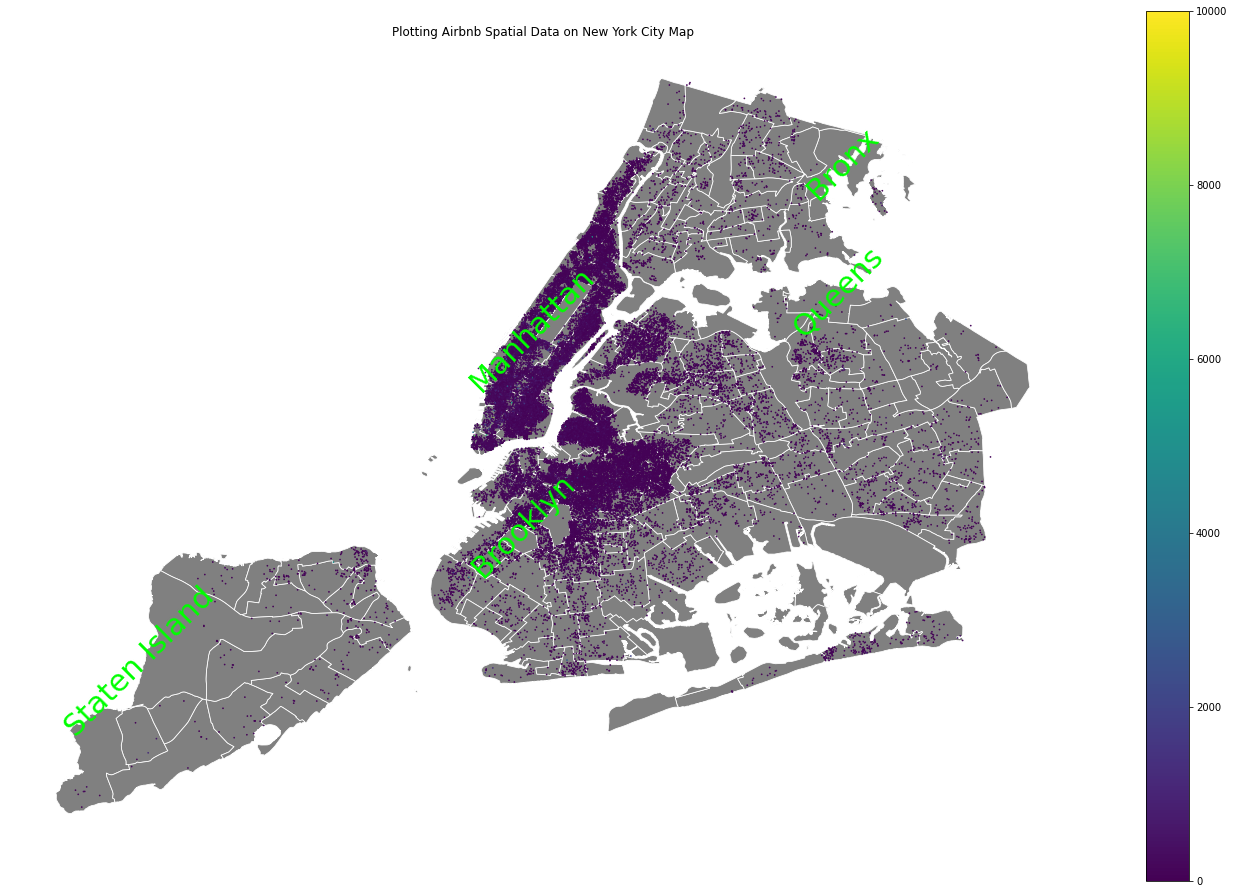

In [12]:
#plotting a map of neighbouring cities where points are allocated by price to know the no. of bookings around the cities so that we can know which cities are the busiest.
fig, ax = plt.subplots(figsize = (24,16))
ax.set_title('Plotting Airbnb Spatial Data on New York City Map')
base=nbhoods.plot(color='grey',edgecolor='white',ax=ax,linewidth=.8)
c=list(df_nyc.neighbourhood_group.unique())
for idx, row in nbhoods.iterrows():
    if row['BoroName'] in c:
        plt.annotate(s=row['BoroName'], xy=row.geom.centroid.coords[0],
                     horizontalalignment='center',color='lime',rotation=45, size=30)
        c.remove(row['BoroName'])
    else:
        pass



geodf_nyc.plot(column='price',ax=base,markersize=.5,legend=True,cmap='viridis')
base.axis('off')

Is there any noticeable difference of traffic among different areas?

> Traffic in Staten Island,Bronx,Queens is lower than Brooklyn and Manhattan, so Brooklyn & Manhattan are the busiest.



In [13]:
before_outlier=df[['price','number_of_reviews','calculated_host_listings_count','minimum_nights']].copy()
columns=['price','number_of_reviews','calculated_host_listings_count','minimum_nights']

In [14]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3-Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range
for i in columns:
    lowerbound,upperbound = outlier_treatment(df[i])
    df.drop(df[ (df[i] > upperbound) | (df[i] < lowerbound) ].index , inplace=True)

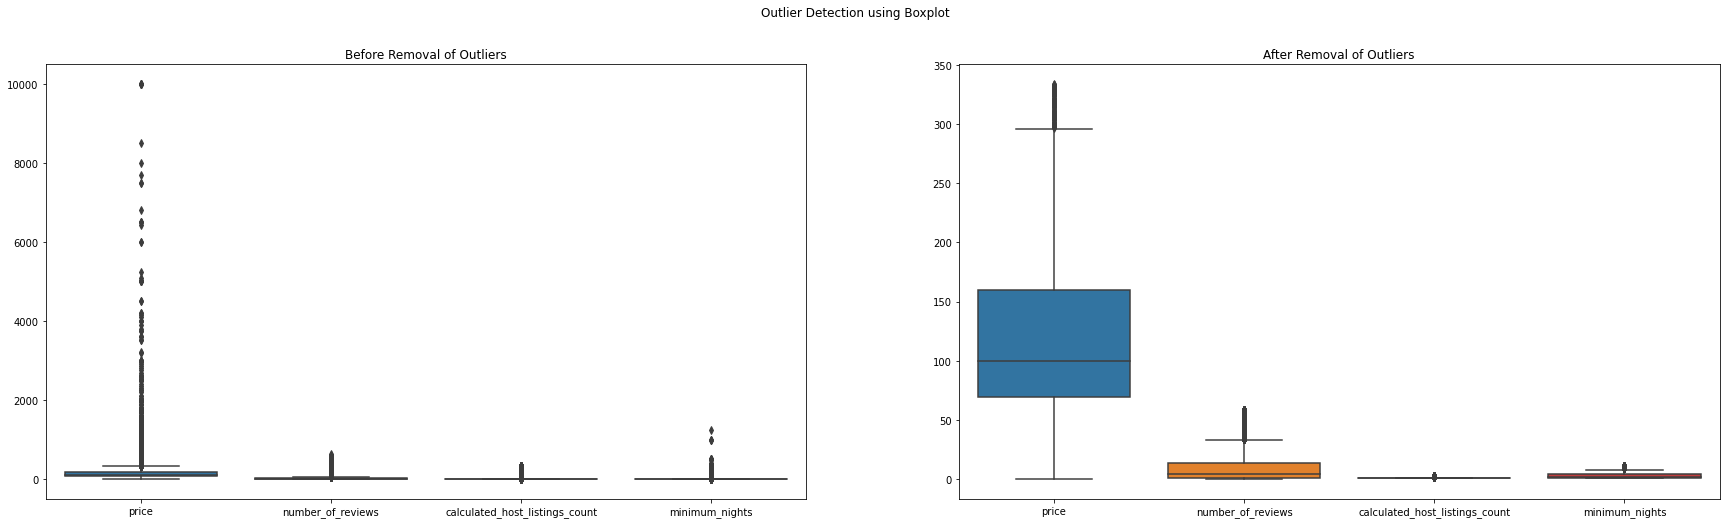

In [15]:
fig, ax =plt.subplots(1,2,figsize=(30,8))
a=sns.boxplot(data=before_outlier,ax=ax[0])
fig.suptitle('Outlier Detection using Boxplot')
a.set(title='Before Removal of Outliers')
b=sns.boxplot(data=df[columns],ax=ax[1])
b.set(title='After Removal of Outliers')
fig.show()

**Statistical Tests**

> Perform a statistical test :- Whether the average price of rooms across all neighbourhood groups is similar or not



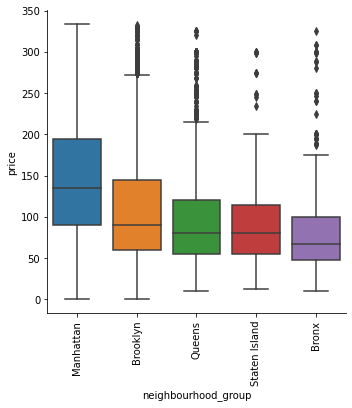

In [16]:
fig = sns.catplot(x='neighbourhood_group',y='price',kind='box',data=df)
fig.set_xticklabels(rotation=90)

In [17]:
#Grouping price and neighbourhood group so that we can see which two values are close for hypothesis testing.
group1 = df[['price','neighbourhood_group']].groupby(by='neighbourhood_group')
group1.mean().reset_index()

,neighbourhood_group,price
0,Bronx,79.847434
1,Brooklyn,107.922336
2,Manhattan,145.000156
3,Queens,94.710161
4,Staten Island,96.421053


>Hypothesis Testing
H0 : price of rooms in Bronx and Queens are equal.
HA : price of rooms in Bronx and Queens are not equal

In [18]:
#Grouping by respective Cities B-Bronx,Q-Queens
B = group1.get_group('Bronx')
Q = group1.get_group('Queens')

In [19]:
#Taking mean and standard deviation of the groups.
m1 = B.mean()
s1 = B.std()

m2= Q.mean()
s2 = Q.std()

print('Mean for price in Bronx {} \n Mean for price in Queens {}'.format(m2,m1))
print('Std for price in Bronx {} \n Std for price in Queens {}'.format(s2,s1))

Mean for price in Bronx price    94.710161
dtype: float64 
 Mean for price in Queens price    79.847434
dtype: float64
Std for price in Bronx price    55.041725
dtype: float64 
 Std for price in Queens price    49.319272
dtype: float64


In [20]:
#length of groups
n1 = len(B)
n2= len(Q)
print(n1,n2)

#Degree of freedom
dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*s1**2  + (n1-1)*s2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

# t - value
t_val = (m1-m2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])

from scipy import stats



721 3533
dof 4252
SP_2 = price    2533.515855
dtype: float64
SP price    50.334043
dtype: float64
tvalue -7.225658001837721


In [21]:
# t-distribution
stats.t.ppf(0.025,dof) 

-1.960522059605113

In [22]:
stats.t.ppf(0.975,dof)

1.9605220596051125

As t_value is not in the range so rejecting null hypothesis


> price of rooms in Bronx and Queens are not equal



>Hypothesis Testing
H0 : price of rooms in Brooklyn and Staten Island are equal.
HA : price of rooms in Brooklyn and Staten Island are not equal

In [23]:
#Grouping by respective Cities Br-Brooklyn,Staten-Staten Island
Br = group1.get_group('Brooklyn')
Staten = group1.get_group('Staten Island')

In [24]:
#Taking mean and standard deviation of the groups.
m1 = Br.mean()
s1 = Br.std()

m2= Staten.mean()
s2 = Staten.std()

In [25]:
#length of groups
n1 = len(Br)
n2= len(Staten)
print(n1,n2)

#degree of freedom
dof = n1+n2-2
print('dof',dof)
sp_2 = ((n2-1)*s1**2  + (n1-1)*s2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

# t - value
t_val = (m1-m2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])


13713 228
dof 13939
SP_2 = price    3439.082669
dtype: float64
SP price    58.643692
dtype: float64
tvalue 2.9370525130431053


In [26]:
# t-distribution
stats.t.cdf(t_val[0],dof) 

0.9983405498615624

In [27]:
# t-distribution
stats.t.ppf(0.025,dof) 

-1.9601341885527361

In [28]:
stats.t.ppf(0.975,dof)

1.9601341885527357

In [29]:
t_val

price    2.937053
dtype: float64

As t_value is not in the range so accepting null hypothesis


> price of rooms in Brooklyn and Staten Island are not equal

In [30]:
Queens = group1.get_group('Queens')

In [31]:
#Taking mean and standard deviation of the groups.
m1 = Queens.mean()
s1 = Queens.std()

m2= Staten.mean()
s2 = Staten.std()

In [32]:
#length of groups
n1 = len(Queens)
n2= len(Staten)
print(n1,n2)

#degree of freedom
dof = n1+n2-2
print('dof',dof)
sp_2 = ((n2-1)*s1**2  + (n1-1)*s2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

# t - value
t_val = (m1-m2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])


3533 228
dof 3759
SP_2 = price    3409.477333
dtype: float64
SP price    58.39073
dtype: float64
tvalue -0.4288111689022051


In [33]:
# t-distribution
stats.t.ppf(0.025,dof) 

-1.9605952753821485

In [34]:
stats.t.ppf(0.975,dof)

1.960595275382148

As t_value is in the range so accepting null hypothesis


> price of rooms in Queens and Staten Island are equal

**Statistical test**
> if they are related what should be case ?


    - there are speicific kind of rooms related to neighbourhood groups
    - assocation


>if they are not related what should be case ?

    - room type does not depend on neighbourhood groups
    - independent
    
- HO: Not Related (no association)
    - alpha > 0.05
- HA: Related (association)
    - alpha < 0.05

## $ChiSquare = \frac{\sum (f_e - f_o)^2} { f_e} $

In [35]:
#Creating a crosstab of neighbourhood groups and room types.
comp_loc = pd.crosstab(df['neighbourhood_group'],df['room_type'],margins=True)
comp_loc

room_type,Entire home/apt,Private room,Shared room,All
neighbourhood_group,,,,
Bronx,243,446,32,721
Brooklyn,6394,7152,167,13713
Manhattan,7269,5266,278,12813
Queens,1412,2016,105,3533
Staten Island,111,115,2,228
All,15429,14995,584,31008


In [36]:
#Total No. of rooms
N = comp_loc.iloc[-1,-1]
N

31008

In [37]:
#rows and columns of crosstab we have created
rows,cols  = comp_loc.shape
rows,cols

(6, 4)

In [38]:
#Finding e of each row and column
E_ij =np.zeros((rows-1,cols-1))
for i in range(cols-1):
    for j in range(rows-1):
        e = (comp_loc.iloc[-1,i] * comp_loc.iloc[j,-1])/N
        print('For {} row and {} col the e ={}'.format(j,i,e))
        E_ij[j,i] = e

For 0 row and 0 col the e =358.7560952012384
For 1 row and 0 col the e =6823.331946594427
For 2 row and 0 col the e =6375.508804179566
For 3 row and 0 col the e =1757.954624613003
For 4 row and 0 col the e =113.44852941176471
For 0 row and 1 col the e =348.6646994324045
For 1 row and 1 col the e =6631.39947755418
For 2 row and 1 col the e =6196.173084365325
For 3 row and 1 col the e =1708.5053857069142
For 4 row and 1 col the e =110.25735294117646
For 0 row and 2 col the e =13.579205366357069
For 1 row and 2 col the e =258.26857585139317
For 2 row and 2 col the e =241.31811145510835
For 3 row and 2 col the e =66.53998968008256
For 4 row and 2 col the e =4.294117647058823


In [39]:
# O_ij
O_ij =  comp_loc.iloc[:-1,:-1].values

In [40]:
O_ij.shape, E_ij.shape

((5, 3), (5, 3))

In [41]:
def chisquare_value(fe,fo):
    chisqure = np.square(fe-fo)/fe
    return chisqure

In [42]:

#Appending Chisquare value in a list
chisqure_list = []
n_row,n_col = O_ij.shape
for i in range(n_row):
    for j in range(n_col):
        chisqure_list.append(
            chisquare_value(E_ij[i,j], O_ij[i,j]))

In [43]:
#Finding chisquare value
chisquare_value = sum(chisqure_list)
print('chisquare_value =',chisquare_value)

chisquare_value = 607.2164242782416


In [44]:
DOF = (n_row-1)*(n_col-1)
print('Degree of Freedom =',DOF)

Degree of Freedom = 8


In [45]:
#Using stats module to determine alpha value
alpha = stats.chi2.pdf(chisquare_value,DOF)
pval = 1-alpha

In [46]:
print('the alpha =',alpha)

the alpha = 3.253779394839106e-126


# Since alpha is less than 0.05 hence , neighbourhood_group and room type are related